<a href="https://colab.research.google.com/github/JuanRoccia/MachineLearningUPSO/blob/main/Laboratorio_Clasificador_Canciones_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Laboratorio de Machine Learning*** 🤖
---
>  ## Clasificador de canciones de Spotify
---
### La meta es establecer a través de herramientas de aprendizaje automático, un clasificador que pueda predecir las inclinaciones musicales de un individuo y predecir si disfrutará o no de una determinada canción.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Primera Parte:** Revisar, acomodar el archivo CSV y primeros ajustes del modelo


##1. **Carga de datos**
  
  Carga del archivo CSV proporcionado para explorar su contenido.

In [ ]:
import pandas as pd

# Cargar el archivo CSV
data_path = '/content/drive/MyDrive/ML&BD/Canciones_Spotify.csv'
df = pd.read_csv(data_path)

# Mostrar las primeras filas del conjunto de datos
df.head()

Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        Mask Off            Future  
1             4.0    0.588       1         Redbone  Childish Gambino  
2             4.0    0.173       1    Xanny Family            Future  
3             4.0    0.230       1  Master Of None       Beach House  
4             4.0    0.904       1  Parallel Lines       Junior Boys

Cargamos el csv desde la ruta proporcionada para explorar su contenido. El conjunto de datos contiene 17 columnas y muestro las primeras 5 filas para tener una idea inicial de su contenido.

## 2. **Exploración inicial**

  Revision de las primeras y últimas filas del conjunto de datos, estadísticas descriptivas y características.

In [ ]:
# Exploración inicial del conjunto de datos

# Primeras filas
df_head = df.head()

# Ultimas filas
df_tail = df.tail()

# Información general del DataFrame
df_info = df.info()

# Descripción estadística de las columnas numéricas
df_description = df.describe()

df_head, df_tail, df_info, df_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


(   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
 0           0        0.0102         0.833       204600   0.434   
 1           1        0.1990         0.743       326933   0.359   
 2           2        0.0344         0.838       185707   0.412   
 3           3        0.6040         0.494       199413   0.338   
 4           4        0.1800         0.678       392893   0.561   
 
    instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
 0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
 1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
 2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
 3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
 4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   
 
    time_signature  valence  target      song_title            artist  
 0             4.0    0.286       1        Mask Off         

Observaciones:

- El conjunto de datos tiene 2017 registros.

- Las columnas representan diferentes características de las canciones, como "acousticness", "danceability", "energy", entre otras.

- La columna "target" es nuestra variable objetivo, donde un valor de "1" indica que la canción fue del agrado del usuario y "0" indica lo contrario.

- Las estadísticas descriptivas nos proporcionan información sobre la distribución de los datos en cada columna, como el valor medio, mínimo, máximo y los percentiles.

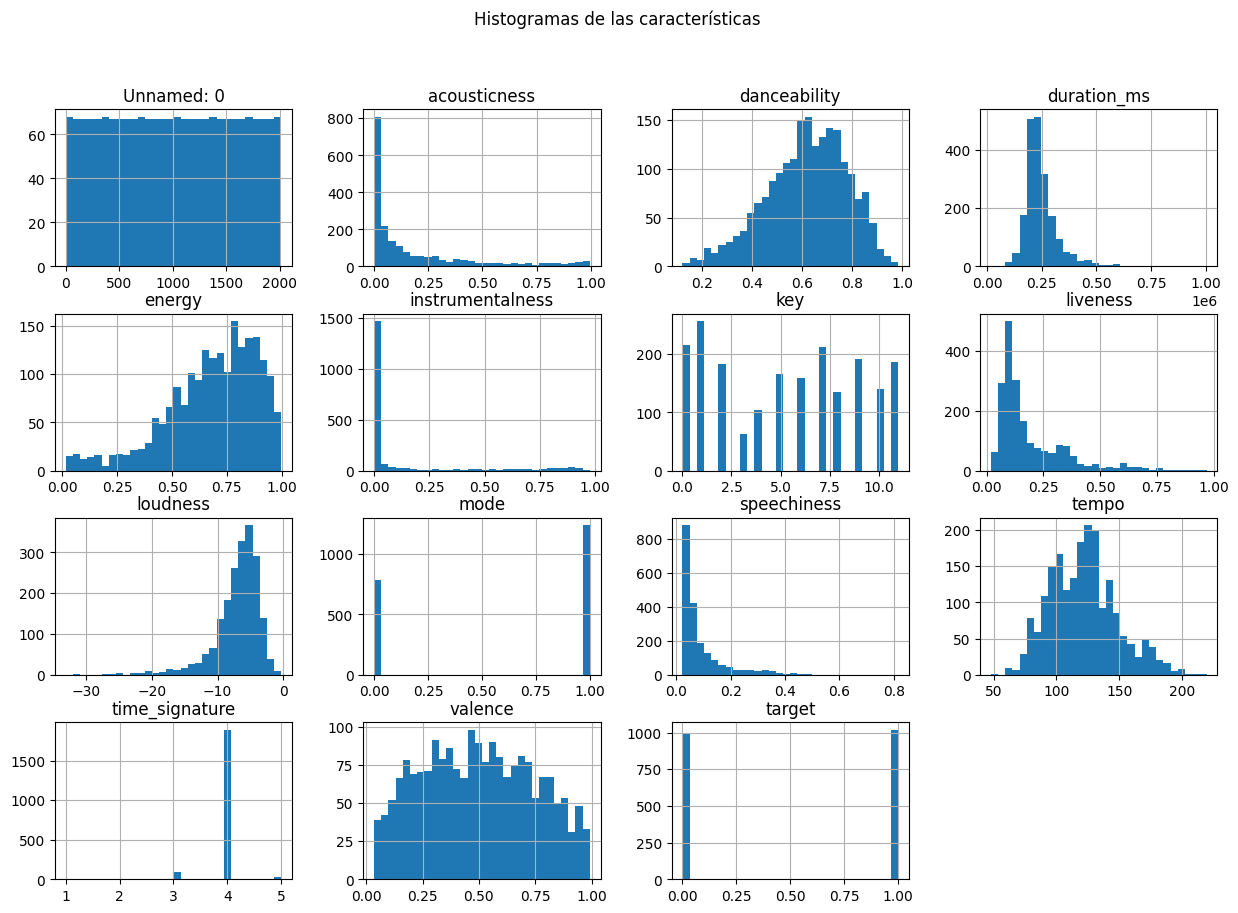

In [ ]:
# Análisis Exploratorio de Datos (EDA): Comprender la distribución de las características y su relación con la variable objetivo.

import seaborn as sns
import matplotlib.pyplot as plt

# Histogramas para ver la distribución de los valores de cada característica individualmente
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogramas de las características")
plt.show()


## 3. **Limpieza de datos**

 Mas exploración, Identificaicon y manejo de valores faltantes y atípicos.

In [ ]:
# Verificar valores faltantes
missing_values = df.isnull().sum()
percentage_missing = (df.isnull().sum() / len(df)) * 100

# Crear un DataFrame para mostrar los valores faltantes y su porcentaje
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': percentage_missing})
missing_data.sort_values(by='Percentage (%)', ascending=False)

Missing Values  Percentage (%)
Unnamed: 0                     0             0.0
mode                           0             0.0
song_title                     0             0.0
target                         0             0.0
valence                        0             0.0
time_signature                 0             0.0
tempo                          0             0.0
speechiness                    0             0.0
loudness                       0             0.0
acousticness                   0             0.0
liveness                       0             0.0
key                            0             0.0
instrumentalness               0             0.0
energy                         0             0.0
duration_ms                    0             0.0
danceability                   0             0.0
artist                         0             0.0

Verificado el conjunto de datos y no hay valores faltantes en ninguna de las columnas. No es necesario realizar imputaciones o eliminar registros.

In [ ]:
# Verificar valores atípicos utilizando el método del rango intercuartil (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Definir límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
percentage_outliers = (outliers / len(df)) * 100

# Crear un DataFrame para mostrar los valores atípicos y su porcentaje
outliers_data = pd.DataFrame({'Outliers': outliers, 'Percentage (%)': percentage_outliers})
outliers_data.sort_values(by='Percentage (%)', ascending=False)

<ipython-input-6-84ee387582c1>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-6-84ee387582c1>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-6-84ee387582c1>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < lower_bound) | (df > upper_bound)).sum()


Outliers  Percentage (%)
instrumentalness       416       20.624690
speechiness            209       10.361924
acousticness           194        9.618245
duration_ms            141        6.990580
liveness               126        6.246901
time_signature         126        6.246901
loudness               105        5.205751
energy                  54        2.677243
tempo                   15        0.743679
danceability            12        0.594943
target                   0        0.000000
Unnamed: 0               0        0.000000
song_title               0        0.000000
mode                     0        0.000000
key                      0        0.000000
artist                   0        0.000000
valence                  0        0.000000

Según los resultados:

- La característica "instrumentalness" tiene el mayor porcentaje de valores atípicos con aproximadamente el 20.62%.

- "speechiness" y "acousticness" también tienen un porcentaje significativo de valores atípicos con 10.36% y 9.62% respectivamente.

- Otras características como "duration_ms", "liveness", y "loudness" tienen valores atípicos, pero en menor proporción.

- Algunas características, como "target", "song_title", "artist", entre otras, no tienen valores atípicos.

Enfoques:

- Mantener los valores atípicos: Si se considera que los valores atípicos son genuinos y pueden aportar información valiosa al análisis.

- Modificar los valores atípicos: Pueden ser reemplazados por valores como la mediana o algún valor de umbral.

- Eliminar los valores atípicos: Si se considera que pueden afectar negativamente el rendimiento de los modelos o el análisis.

In [ ]:
# Visualizacion mas a fondo de los valores atípicos
import plotly.graph_objects as go

# Crear una figura de Plotly
fig = go.Figure()

# Agregar boxplots a la figura
fig.add_trace(go.Box(y=df['instrumentalness'], name='Instrumentalness'))
fig.add_trace(go.Box(y=df['speechiness'], name='Speechiness'))
fig.add_trace(go.Box(y=df['acousticness'], name='Acousticness'))
fig.add_trace(go.Box(y=df['danceability'], name='Danceability'))

# Actualizar el layout para mostrar los títulos y hacer que la figura sea más grande
fig.update_layout(
    title='Distribución de Características con Valores Atípicos',
    yaxis=dict(title='Valor'),
    boxmode='group', # Muestra los boxplots en grupos en lugar de superpuestos
    height=800, # Altura de la figura
)

# Mostrar la figura
fig.show()


In [ ]:
import plotly.express as px

# Violin plot interactivo para 'instrumentalness'
fig = px.violin(df, y='instrumentalness', box=True, points="all",
                title="Distribución de Instrumentalness",
                labels={'instrumentalness': 'Instrumentalness'})
fig.show()

# Violin plot interactivo para 'speechiness'
fig = px.violin(df, y='speechiness', box=True, points="all",
                title="Distribución de Speechiness",
                labels={'speechiness': 'Speechiness'})
fig.show()

# Violin plot para 'acousticness'
fig = px.violin(df, y='acousticness', box=True, points="all",
                title="Distribución de Acousticness",
                labels={'acousticness': 'Acousticness'})
fig.show()

# Un Violin interactivo para 'danceability'
fig = px.violin(df, y='danceability', box=True, points="all",
                title="Distribución de Danceability",
                labels={'danceability': 'Danceability'})
fig.show()


In [ ]:
# Visualizacion mass detallada de 'instrumentalness'
import plotly.express as px

# Crear un scatter plot para 'instrumentalness'
fig = px.scatter(df, y='instrumentalness', color='instrumentalness',
                 title="Distribución de Instrumentalness con Mediana",
                 labels={'instrumentalness': 'Instrumentalness'})

# Agregar una línea para la mediana
fig.add_hline(y=df['instrumentalness'].median(), line_dash="dash", line_color="red")

# Mostrar el gráfico
fig.show()


Instrumentalness (Instrumentalidad):

- La mayoría de los valores están entre 0 y 0.2, lo que sugiere que muchas canciones tienen una baja presencia de partes puramente instrumentales.
- El tercer cuartil en 0.05 y los valores atípicos a partir de upper fence 0.135 indican que hay canciones con una cantidad significativa de contenido instrumental, aunque son menos comunes.
- La disminución de valores entre 0.5 y 0.8 podría indicar un rango donde hay menos canciones que son predominantemente instrumentales.
- Sin embargo, hay un aumento notable de valores entre 0.8 y 1, lo que sugiere que hay un grupo de canciones que son casi o completamente instrumentales.

Speechiness (Presencia de Palabras Habladas):

- Una mediana de 0.05 indica que, en general, las canciones no tienen una gran cantidad de palabras habladas.
- La presencia de menos valores atípicos en comparación con 'instrumentalness' sugiere que la variabilidad en la cantidad de palabras habladas es menor.
- Esto podría significar que la presencia de palabras habladas es más consistente entre las canciones, con menos casos extremos. Es decir que no varía tanto de una canción a otra como podrían hacerlo otras características, como "acousticness" o "instrumentalness".

Acousticness (Acústica):

- La mediana de 0.06 sugiere que la mayoría de las canciones tienen un bajo nivel de acústica.
- Hay un volumen significativo de valores concentrados entre 0 y 0.2, lo que indica que muchas canciones tienen una baja acústica.
- Los valores atípicos comienzan a aparecer cerca de 0.2 y se extienden hacia arriba, lo que indica que hay canciones con niveles de acústica inusualmente altos en comparación con la mayoría.
- La presencia de valores atípicos sugiere que hay una variedad considerable en la acústica de las canciones, con algunas siendo mucho más acústicas que otras.

Danceability (Capacidad de Baile):

- Con una mediana de 0.6, el tercer cuartil de 0.7 y el primer cuartil de 0.5, la mayoría de las canciones están diseñadas para ser bailables.
- Los límites inferior y superior (0.1 y 0.9) muestran que hay canciones que son excepcionalmente no bailables o extremadamente bailables.
- Los valores atípicos tanto por debajo como por encima de los cuartiles sugieren que hay canciones que se desvían significativamente de la norma en términos de su capacidad de baile.

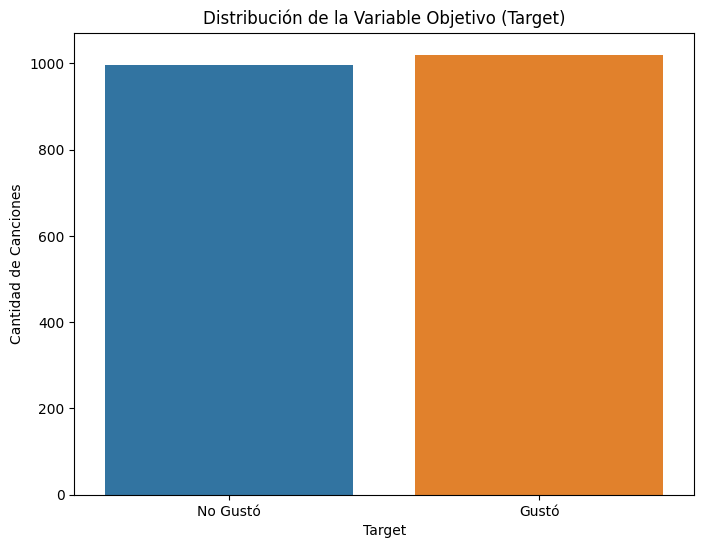

In [ ]:
# Visualizar la distribución de la variable objetivo 'target'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x=df['target'])
plt.title('Distribución de la Variable Objetivo (Target)')
plt.xlabel('Target')
plt.ylabel('Cantidad de Canciones')
plt.xticks(ticks=[0, 1], labels=['No Gustó', 'Gustó'])
plt.show()

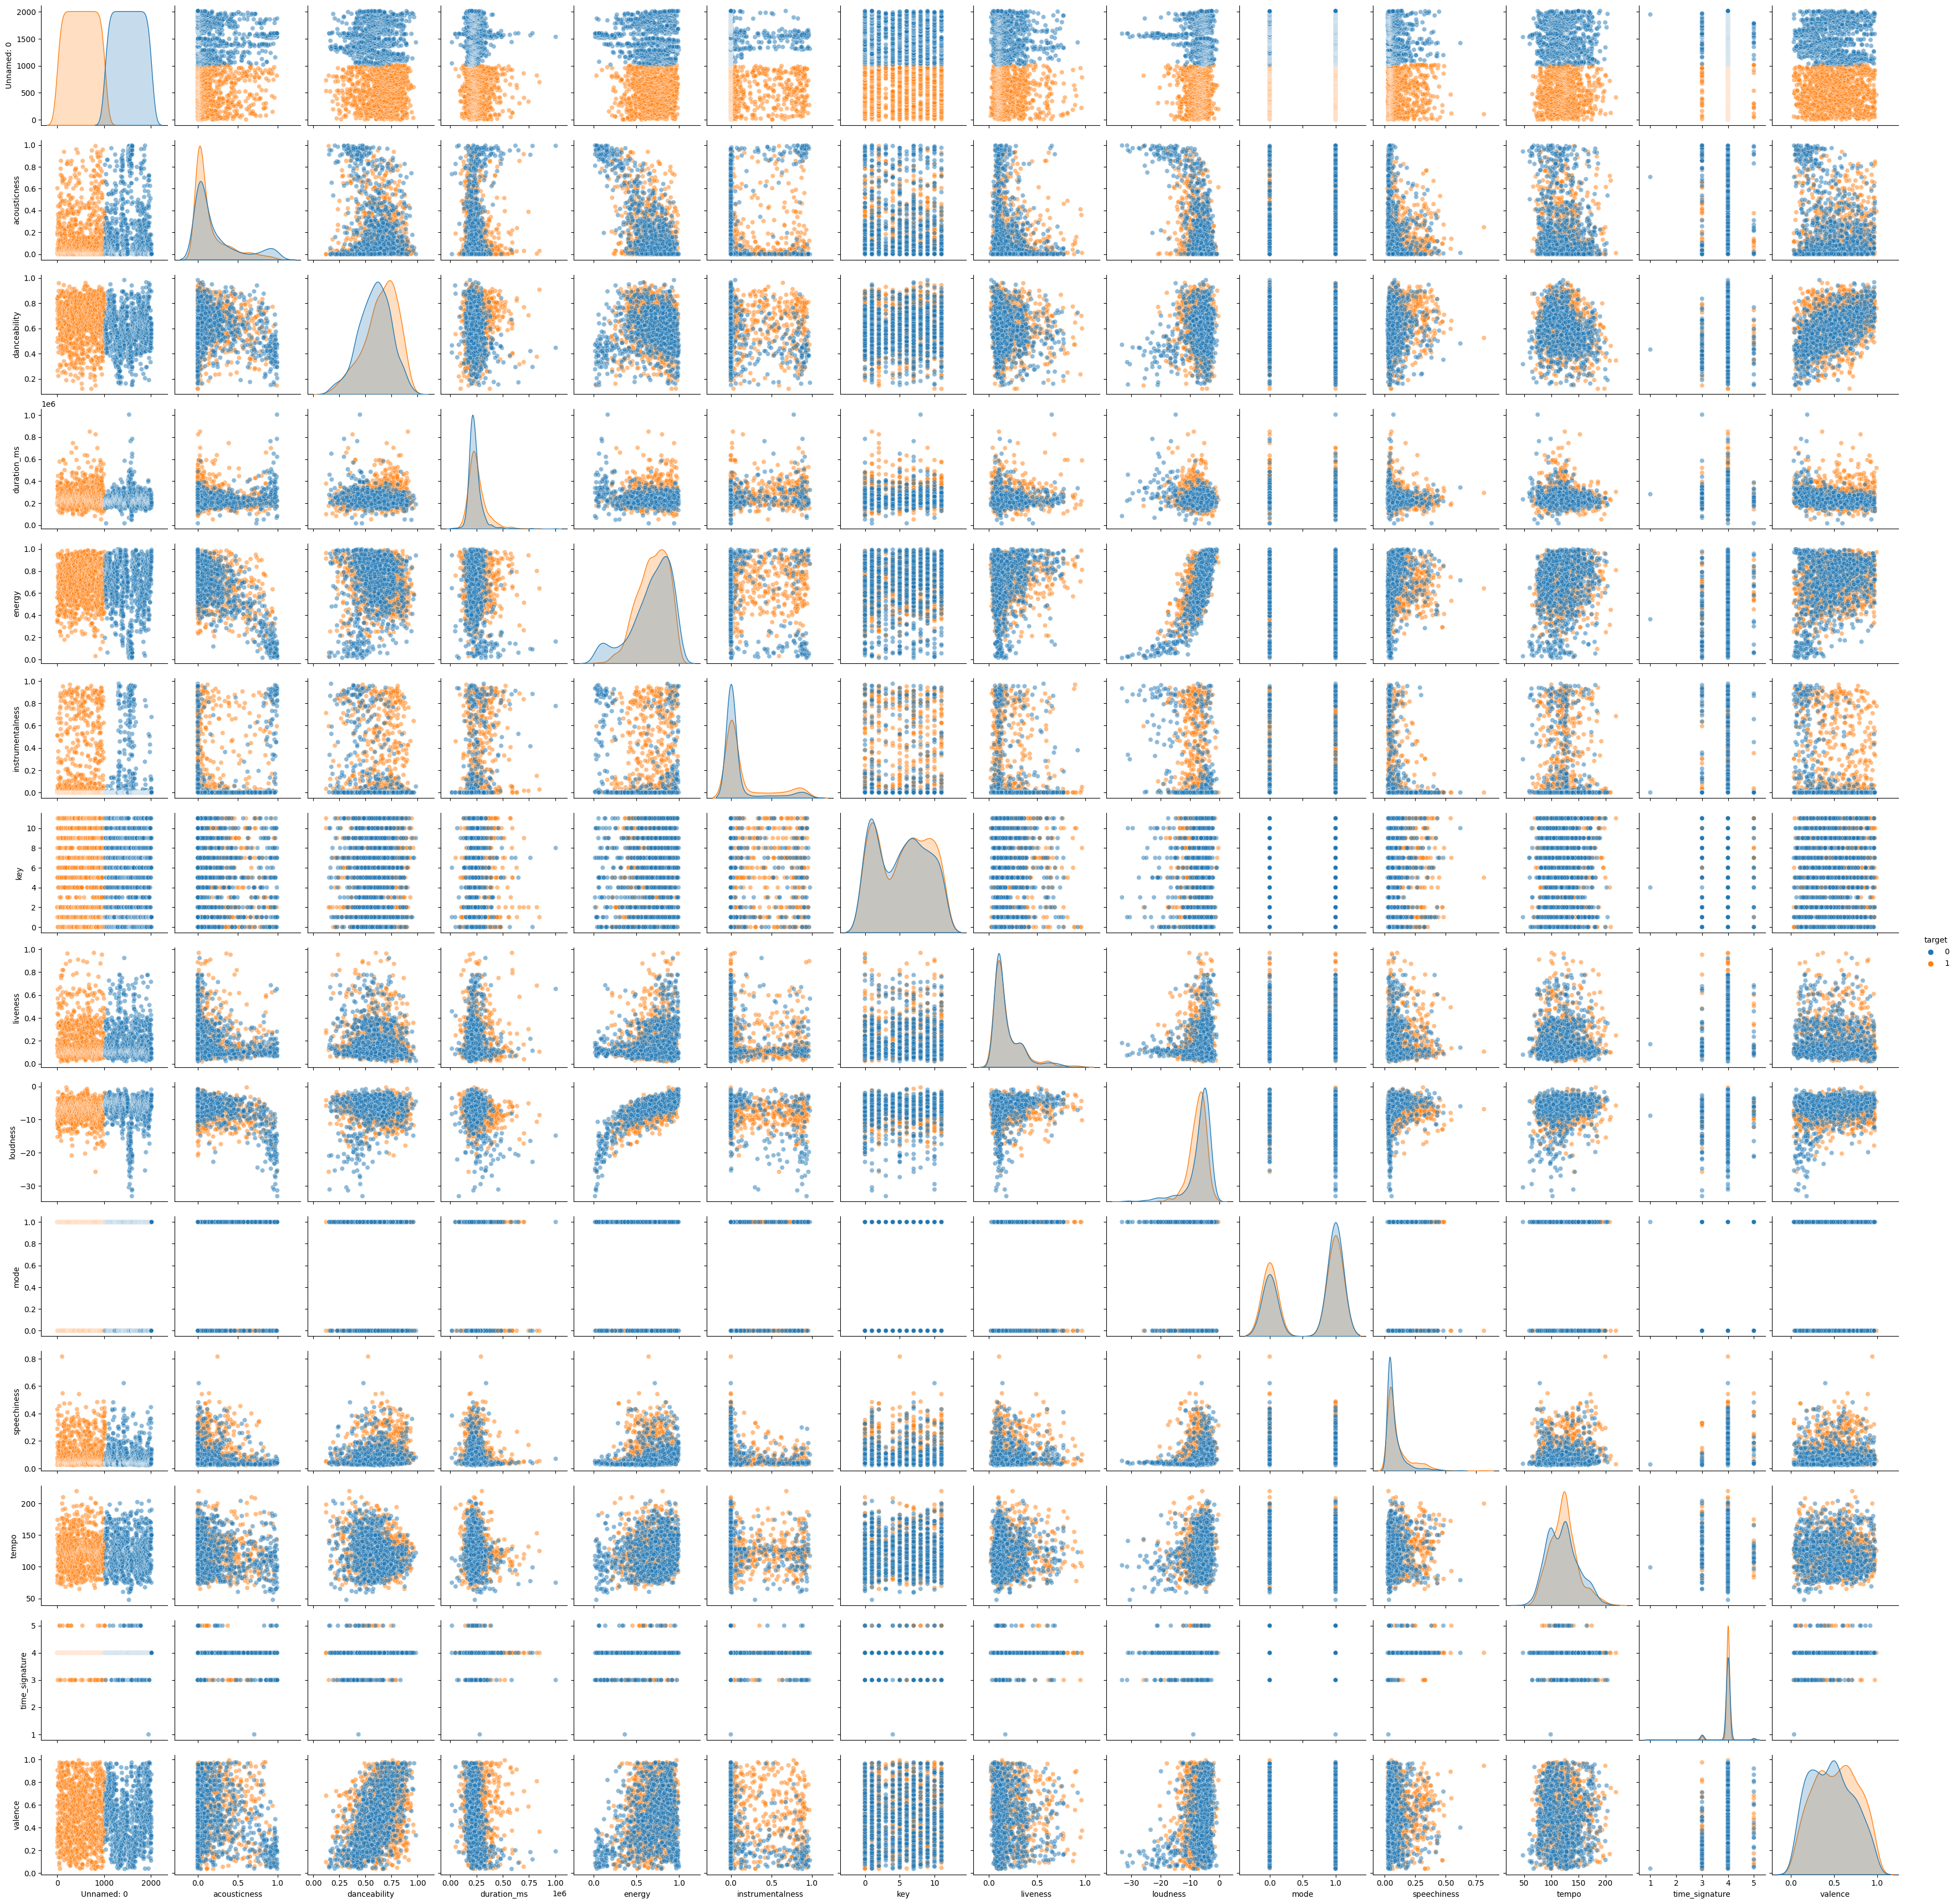

In [ ]:
# Matriz de gráficos para ver las relaciones bivariadas y cómo las diferentes clases se separan entre sí en el espacio de características.
sns.pairplot(df, hue='target', plot_kws={'alpha': 0.5})

plt.show()

<ipython-input-10-099ccaf4622c>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



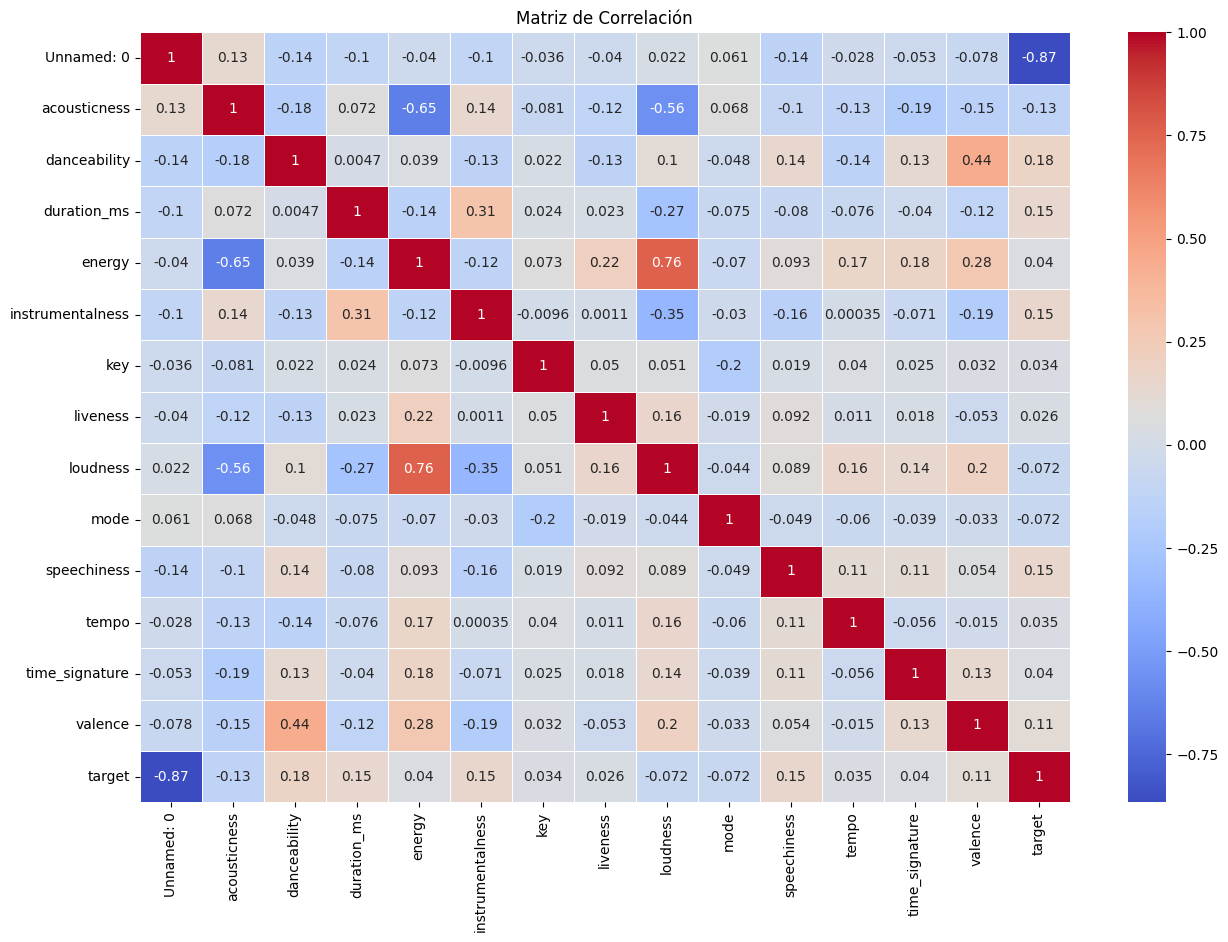

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Las celdas rojas en la matriz, significa que esas dos características tienden a aumentar o disminuir juntas. Por lo tanto, laa correlación de 0.76 entre 'energy' y 'loudness' indica que las canciones con más energía suelen ser también más ruidosas. Esto tiene sentido intuitivamente, ya que las pistas que son percibidas como más enérgicas sulen tener un volumen más alto, más dinámica y una mayor presencia de frecuencias altas, lo que contribuye a una sensación de mayor "potencia" o "fuerza" en la música.

Una correlación negativa de -0.56 entre 'acousticness' y 'loudness' sugiere que, en general, las canciones con mayor acústica tienden a tener un volumen más bajo, y las canciones con menor acústica tienden a ser más ruidosas. Por lo tanto, no es que ambas disminuyan al mismo tiempo, sino que se mueven en direcciones opuestas. Esto tambien parece ser intuitivo en el caso de 'acousticness' y 'loudness', ya que a menudo esperaríamos que las grabaciones más acústicas y menos procesadas sean menos ruidosas que las producciones más electrónicas o altamente procesadas.

In [ ]:
# Otra matriz pero con plotly, porque si
import plotly.figure_factory as ff

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear la figura interactiva con Plotly
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.to_numpy(),
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.columns.tolist(),
    annotation_text=correlation_matrix.round(2).astype(str).values,
    showscale=True,
    autocolorscale=True
)

# Actualizar el layout para mostrar los títulos
fig.update_layout(
    title='Matriz de Correlación',
    height=800, # Altura de la figura
    xaxis=dict(tickangle=-15),
    yaxis=dict(tickangle=0)
)

# Mostrar la figura
fig.show()


<ipython-input-11-cba25a140da9>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



La matriz de correlación puede ayudar a identificar qué características son más relevantes para predecir si una canción gustará o no. Esto es crucial para la selección de características en la construcción de modelos predictivos. Si una característica tiene muy poca o ninguna correlación con 'target', podría no ser útil incluirla en el modelo. Por otro lado, características con alta correlación podrían ser muy informativas.

Además, si dos características tienen una correlación muy alta entre sí, podría considerar usar solo una de ellas para evitar la multicolinealidad en el modelo predictivo. La multicolinealidad puede hacer que el modelo sea inestable y difícil de interpretar.

## 4. **Primeros ajustes**

  Primeros ajustes del dataset en base a las caracteristicas relevantes.

In [ ]:
# Selección de Características: Basada en la correlación y la importancia de las características.

import pandas as pd
import numpy as np

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar las correlaciones con 'target'
correlations_with_target = correlation_matrix['target'].sort_values(ascending=False)

# Imprimir las correlaciones con 'target'
print("Correlaciones con 'target':")
print(correlations_with_target)

# Identificar características con baja correlación con 'target'
low_correlation_features = correlations_with_target[abs(correlations_with_target) < 0.1].index.tolist()
print("\nCaracterísticas con baja correlación con 'target':")
print(low_correlation_features)

# Identificar pares de características con alta correlación entre sí
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

print("\nPares de características con alta correlación:")
print(high_correlation_pairs)


Correlaciones con 'target':
target              1.000000
danceability        0.176706
speechiness         0.154006
instrumentalness    0.152594
duration_ms         0.146749
valence             0.107930
time_signature      0.040182
energy              0.039688
tempo               0.034732
key                 0.033594
liveness            0.026364
loudness           -0.072000
mode               -0.072336
acousticness       -0.129627
Unnamed: 0         -0.865969
Name: target, dtype: float64

Características con baja correlación con 'target':
['time_signature', 'energy', 'tempo', 'key', 'liveness', 'loudness', 'mode']

Pares de características con alta correlación:
[('Unnamed: 0', 'target'), ('acousticness', 'energy'), ('acousticness', 'loudness'), ('energy', 'loudness')]


<ipython-input-13-fbcaac40d820>:7: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Los resultados proporcionados ofrecen una visión clara de cómo proceder con la selección de características para el modelo predictivo.

Correlaciones con 'target': Las características 'danceability', 'speechiness', 'instrumentalness', 'duration_ms' y 'valence' tienen las correlaciones más fuertes con 'target', aunque ninguna supera el umbral de 0.2. Esto sugiere que, aunque estas características tienen alguna relación con la preferencia de una canción, no hay una única característica que sea un predictor dominante. Esto es común en modelos de comportamiento humano donde múltiples factores contribuyen a la decisión final.

Con esta información, puedo ajustar el conjunto de datos para el modelado predictivo. Eliminando 'Unnamed: 0' y considerando excluir o combinar características con baja correlación con 'target'. Además, tratar la multicolinealidad eliminando o combinando características altamente correlacionadas. Una vez hecho esto, estaria listo para entrenar el modelo y evaluar su rendimiento.

In [ ]:
# Eliminación de características con baja correlación (opcional)

# Lista de caractersiticas con baja correlaciín
low_corr_features = ['time_signature', 'energy', 'tempo', 'key', 'liveness', 'loudness', 'mode']
# low_corr_features = ['key', 'mode', 'tempo', 'time_signature', 'duration_ms']
# low_corr_features = ['key', 'mode']
df_reduced = df.drop(low_corr_features, axis=1)


In [ ]:
# Tratamiento de multicolinealidad (opcional)

# Eliminación de una de las características de cada par altamente correlacionado
high_corr_pairs = ['energy', 'loudness']
df_reduced = df_reduced.drop(high_corr_pairs, axis=1)

In [ ]:
# Limpieza del dataset:
bye_columns = ['Unnamed: 0', 'song_title', 'artist']
df_reduced = df.drop(bye_columns, axis=1)

## 5. **Preparación de datos**
  
  Preparación de los datos para el análisis, lo que puede incluir la División del Conjunto de Datos: Crear conjuntos de entrenamiento y prueba, codificación de variables categóricas, la normalización de características y otras transformaciones.

In [ ]:
# División del Conjunto de Datos: Crear conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X = df_reduced.drop(['target'], axis=1)
y = df_reduced['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Entrenamiento de Modelos: Entrenar diferentes modelos de clasificación.

In [ ]:
# Entrenamiento de Modelos: Entrenar diferentes modelos de clasificación.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
import lightgbm as lgb

# Ejemplo con KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Ejemplo con SVM
svm = SVC()
svm.fit(X_train, y_train)

# Ejemplo con Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Ejemplo con Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Otros modelos:

# Ejemplo con Regresión Logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Ejemplo con Linear Support Vector Classification
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

# LGBM
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 822, number of negative: 791
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2567
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509609 -> initscore=0.038442
[LightGBM] [Info] Start training from score 0.038442


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LGBMClassifier()

### Validacion Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

# Ejemplo con KNN
knn_scores = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5)
print(f"KNN Accuracy: {knn_scores.mean()} (+/- {knn_scores.std() * 2})")

# Ejemplo con SVM
svm_scores = cross_val_score(SVC(), X_train, y_train, cv=5)
print(f"SVM Accuracy: {svm_scores.mean()} (+/- {svm_scores.std() * 2})")

# Ejemplo con Decision Tree
tree_scores = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5)
print(f"Decision Tree Accuracy: {tree_scores.mean()} (+/- {tree_scores.std() * 2})")

# Ejemplo con Naive Bayes
nb_scores = cross_val_score(GaussianNB(), X_train, y_train, cv=5)
print(f"Naive Bayes Accuracy: {nb_scores.mean()} (+/- {nb_scores.std() * 2})")

# Ejemplo con Logistic Regression
logreg_scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print(f"Logistic Regression Accuracy: {logreg_scores.mean()} (+/- {logreg_scores.std() * 2})")

# Ejemplo con Linear SVC
linear_svc_scores = cross_val_score(LinearSVC(), X_train, y_train, cv=5)
print(f"Linear SVC Accuracy: {linear_svc_scores.mean()} (+/- {linear_svc_scores.std() * 2})")

# Ejemplo con LGBM
lgbm_scores = cross_val_score(LGBMClassifier(), X_train, y_train, cv=5)
print(f"LGBM Accuracy: {lgbm_scores.mean()} (+/- {lgbm_scores.std() * 2})")


KNN Accuracy: 0.5567178816606735 (+/- 0.04453403723974404)
SVM Accuracy: 0.5635482568313366 (+/- 0.02791677639309146)
Decision Tree Accuracy: 0.6943464800107687 (+/- 0.05120070375811437)
Naive Bayes Accuracy: 0.6156298675076438 (+/- 0.025597892758964153)
Logistic Regression Accuracy: 0.5096090610157106 (+/- 0.0023108131074660193)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Linear SVC Accuracy: 0.4984520123839009 (+/- 0.019107354840318728)
[LightGBM] [Info] Number of positive: 657, number of negative: 633
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000311 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2563
[LightGBM] [Info] Number of data points in the train set: 1290, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509302 -> initscore=0.037214
[LightGBM] [Info] Start training from score 0.037214
[LightGBM] [Info] Number of positive: 657, number of negative: 633
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2564
[LightGBM] [Info] Number of data points in the train set: 1290, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509302 -> initscore=0.037214
[LightGBM] [

### Evaluación de Modelos: Calcular métricas de rendimiento.

In [ ]:
# Evaluación de Modelos: Calcular métricas de rendimiento.

from sklearn.metrics import classification_report, confusion_matrix

# Ejemplo con KNN
y_pred_knn = knn.predict(X_test)
print('Modelo: K-Nearest Neighbors')
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

# Ejemplo con SVM
y_pred_svm = svm.predict(X_test)
print('Modelo: Support Vector Machines')
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

# Ejemplo con Decision Tree
y_pred_tree = tree.predict(X_test)
print('Modelo: Decision Tree')
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))

# Ejemplo con Naive Bayes
y_pred_nb = nb.predict(X_test)
print('Modelo: Naive Bayes')
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

# Ejemplo con Regresión Logística
y_pred_logreg = logreg.predict(X_test)
print('Modelo: Regresión Logística')
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

# Ejemplo con Linear Support Vector Classification
y_pred_linear_svc = linear_svc.predict(X_test)
print('Modelo: Support Vector Classification')
print(classification_report(y_test, y_pred_linear_svc))
print(confusion_matrix(y_test, y_pred_linear_svc))

# Ejemplo con LGBM
y_pred_lgbm = lgbm.predict(X_test)
print('Modelo: Light Gradient Boosting Machine')
print(classification_report(y_test, y_pred_lgbm))
print(confusion_matrix(y_test, y_pred_lgbm))


Modelo: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       206
           1       0.55      0.57      0.56       198

    accuracy                           0.56       404
   macro avg       0.56      0.56      0.56       404
weighted avg       0.56      0.56      0.56       404

[[114  92]
 [ 85 113]]
Modelo: Support Vector Machines
              precision    recall  f1-score   support

           0       0.55      0.86      0.67       206
           1       0.64      0.26      0.37       198

    accuracy                           0.57       404
   macro avg       0.59      0.56      0.52       404
weighted avg       0.59      0.57      0.52       404

[[177  29]
 [146  52]]
Modelo: Decision Tree
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       206
           1       0.68      0.68      0.68       198

    accuracy                           0.69       404


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` p

In [ ]:
from sklearn.metrics import accuracy_score

# Calcula la precisión para cada modelo
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_linear_svc = accuracy_score(y_test, y_pred_linear_svc)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)

# Imprime las precisiones para verificar
print("Precisión KNN:", accuracy_knn)
print("Precisión SVM:", accuracy_svm)
print("Precisión Árbol de Decisión:", accuracy_tree)
print("Precisión Naive Bayes:", accuracy_nb)
print("Precisión Regresión Logística:", accuracy_logreg)
print("Precisión Linear SVC:", accuracy_linear_svc)
print("Precisión Linear LGBM:", accuracy_lgbm)

# Almacena las precisiones en una lista
accuracies = [accuracy_knn, accuracy_svm, accuracy_tree, accuracy_nb, accuracy_logreg, accuracy_linear_svc, accuracy_lgbm]

# Calcula el promedio de las precisiones
average_accuracy = sum(accuracies) / len(accuracies)
print("La precisión promedio de los modelos es:", average_accuracy)

Precisión KNN: 0.5618811881188119
Precisión SVM: 0.5668316831683168
Precisión Árbol de Decisión: 0.6905940594059405
Precisión Naive Bayes: 0.6014851485148515
Precisión Regresión Logística: 0.4900990099009901
Precisión Linear SVC: 0.5099009900990099
Precisión Linear LGBM: 0.806930693069307
La precisión promedio de los modelos es: 0.6039603960396039


### Ajuste de Hiperparámetros: Utilizando Grid Search o Random Search para optimizar los modelos.

In [ ]:
#@title Ajuste de Hiperparámetros KNN:

from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# Ejemplo con KNN
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejores parámetros y mejor puntuación
print(grid_search.best_params_)
print(grid_search.best_score_)

# Crear una nueva instancia de KNeighborsClassifier con el número óptimo de vecinos
knn_optimized = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])

# Entrenar el modelo optimizado con los datos de entrenamiento
knn_optimized.fit(X_train, y_train)

{'n_neighbors': 9}
0.5678730073265005


KNeighborsClassifier(n_neighbors=9)

In [ ]:
#@title Hiperparámetros para SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Mejores parámetros y mejor puntuación para SVM
print(grid_search_svm.best_params_)
print(grid_search_svm.best_score_)

# Crear una nueva instancia de SVC con los mejores parámetros
svm_optimized = SVC(
    C=grid_search_svm.best_params_['C'],
    gamma=grid_search_svm.best_params_['gamma'],
    kernel=grid_search_svm.best_params_['kernel']
)

# Entrenar el modelo optimizado con los datos de entrenamiento
svm_optimized.fit(X_train, y_train)

In [ ]:
#@title Hiperparámetros para Decision Tree
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

# Mejores parámetros y mejor puntuación para Decision Tree
print(grid_search_tree.best_params_)
print(grid_search_tree.best_score_)

# Crear una nueva instancia de DecisionTreeClassifier con los mejores parámetros
tree_optimized = DecisionTreeClassifier(
    max_depth=grid_search_tree.best_params_['max_depth'],
    min_samples_split=grid_search_tree.best_params_['min_samples_split'],
    min_samples_leaf=grid_search_tree.best_params_['min_samples_leaf']
)

# Entrenar el modelo optimizado con los datos de entrenamiento
tree_optimized.fit(X_train, y_train)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.7123396727111898


DecisionTreeClassifier(max_depth=10)

In [ ]:
#@title Hiperarámetros para MultinomialNB (Naive Bayes)
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

# Parámetros para MultinomialNB
param_grid_nb = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

grid_search_nb = GridSearchCV(MultinomialNB(), param_grid_nb, cv=5, scoring='accuracy')

# Escala los datos para que todas las características sean no negativas
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Ahora puedes intentar ajustar el modelo nuevamente con los datos escalados
grid_search_nb.fit(X_train_scaled, y_train)

# Mejores parámetros y mejor puntuación para MultinomialNB
print(grid_search_nb.best_params_)
print(grid_search_nb.best_score_)

# Crear una nueva instancia de MultinomialNB con el mejor parámetro alpha
nb_optimized = MultinomialNB(alpha=grid_search_nb.best_params_['alpha'])

# Entrenar el modelo optimizado con los datos escalados
nb_optimized.fit(X_train_scaled, y_train)

{'alpha': 1.0}
0.6156414053035402


MultinomialNB()

In [ ]:
#@title Hiperparámetros para Regresión Logística
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search_logreg = GridSearchCV(LogisticRegression(), param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)

# Mejores parámetros y mejor puntuación para Regresión Logística
print(grid_search_logreg.best_params_)
print(grid_search_logreg.best_score_)

# Crear una nueva instancia de LogisticRegression con los mejores parámetros
logreg_optimized = LogisticRegression(C=grid_search_logreg.best_params_['C'],
                                      penalty=grid_search_logreg.best_params_['penalty'],
                                      solver=grid_search_logreg.best_params_['solver'],
                                      random_state=42)

# Entrenar el modelo optimizado
logreg_optimized.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.6484722035267196


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(C=100, penalty='l1', random_state=42, solver='liblinear')

In [ ]:
#@title Hiperparámetros para LinearSVC
param_grid_linear_svc = {
    'C': [0.01, 0.1, 1, 10, 100],
    'loss': ['hinge', 'squared_hinge']
}

grid_search_linear_svc = GridSearchCV(LinearSVC(), param_grid_linear_svc, cv=5, scoring='accuracy')
grid_search_linear_svc.fit(X_train, y_train)

# Mejores parámetros y mejor puntuación para LinearSVC
print(grid_search_linear_svc.best_params_)
print(grid_search_linear_svc.best_score_)

# Inicializar LinearSVC con los mejores parámetros encontrados
linear_svc_optimized = LinearSVC(C=grid_search_linear_svc.best_params_['C'],
                                 loss=grid_search_linear_svc.best_params_['loss'],
                                 random_state=42)

# Entrenar el modelo optimizado
linear_svc_optimized.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: Convergen

{'C': 0.01, 'loss': 'squared_hinge'}
0.5027863777089784


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC(C=0.01, random_state=42)

In [ ]:
#@title Hiperparámetros para LGBM
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Definir el conjunto de hiperparámetros para probar
param_grid = {
    'num_leaves': [31, 50, 70],  # Número de hojas en un árbol
    'max_depth': [10, 20, -1],  # Profundidad máxima de los árboles. -1 significa sin límite
    'learning_rate': [0.1, 0.01, 0.001],  # Tasa de aprendizaje
    'n_estimators': [100, 200, 500]  # Número de árboles a construir
}

# Crear un modelo LGBM para usar con GridSearchCV
lgbm = LGBMClassifier(random_state=42)

# Crear una instancia de GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y la mejor puntuación obtenida
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

# Crear una nueva instancia de LGBMClassifier con los mejores parámetros encontrados
lgbm_optimized = LGBMClassifier(**grid_search.best_params_, random_state=42)

# Entrenar el modelo optimizado con los datos de entrenamiento
lgbm_optimized.fit(X_train, y_train)


### Ensamble de Modelos: Combinar diferentes modelos para mejorar el rendimiento.

In [ ]:
# Ensamble de Modelos: Combinar diferentes modelos para mejorar el rendimiento.

from sklearn.ensemble import VotingClassifier

# Crear un ensamble de votación
ensemble = VotingClassifier(estimators=[
    ('KNN', knn_optimized),
    ('SVM', svm),
    ('Árbol de Decisión', tree_optimized),
    ('Naive Bayes', nb),
    ('Regresión Logística', logreg_optimized),
    ('Linear SVC', linear_svc_optimized),
    ('LGBM', lgbm)
], voting='hard')

ensemble.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 822, number of negative: 791
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000389 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2567
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509609 -> initscore=0.038442
[LightGBM] [Info] Start training from score 0.038442


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=9)),
                             ('SVM', SVC()),
                             ('Árbol de Decisión',
                              DecisionTreeClassifier(max_depth=10)),
                             ('Naive Bayes', GaussianNB()),
                             ('Regresión Logística',
                              LogisticRegression(C=100, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('Linear SVC', LinearSVC(C=0.01, random_state=42)),
                             ('LGBM', LGBMClassifier())])

In [ ]:
# Predecir las etiquetas para el conjunto de prueba
y_pred_ensemble = ensemble.predict(X_test)

# Evaluar el ensamble
print(classification_report(y_test, y_pred_ensemble))
print(confusion_matrix(y_test, y_pred_ensemble))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       206
           1       0.71      0.77      0.74       198

    accuracy                           0.74       404
   macro avg       0.74      0.74      0.74       404
weighted avg       0.74      0.74      0.73       404

[[145  61]
 [ 46 152]]


In [ ]:
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix
import numpy as np

# Generar las predicciones del ensamble
y_pred_ensemble = ensemble.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_ensemble)

# Convertir la matriz de confusión en un formato amigable para Plotly
x = ['Clase 0', 'Clase 1']
y = ['Clase 0', 'Clase 1']

# Crear la figura de Plotly
fig = ff.create_annotated_heatmap(z=cm, x=x, y=y, colorscale='Viridis', showscale=True)

# Actualizar los títulos y diseño
fig.update_layout(title_text='Matriz de Confusión con Plotly',
                  xaxis=dict(title='Predicción'),
                  yaxis=dict(title='Verdadero'))

# Mostrar la figura
fig.show()


**Rendimiento del modelo:**

- **Precisión (Precision)**: Indica la proporción de identificaciones positivas que fue realmente correcta. Para la clase 0 (supongamos que es la clase negativa), la precisión es del 76%, lo que significa que de todas las instancias que el modelo predijo como clase 0, el 76% de esas predicciones fueron correctas. Para la clase 1 (la clase positiva), la precisión es del 71%.

- **Recuperación (Recall)**: También conocido como sensibilidad, indica la proporción de positivos reales que se identificaron correctamente. Para la clase 0, el modelo tiene un recall del 70%, lo que significa que pudo identificar correctamente el 70% de todos los verdaderos casos de la clase 0. Para la clase 1, el recall es del 77%.

- **Puntuación F1 (F1-score)**: Es una medida que combina la precisión y el recall en una sola métrica que da un balance entre ambas. Para ambas clases, la puntuación F1 está alrededor del 73-74%, lo que indica un equilibrio razonable entre precisión y recall.

- **Soporte (Support)**: Es el número de ocurrencias reales de la clase en el conjunto de datos. Para la clase 0, hay 206 instancias, y para la clase 1, hay 198.

- **Exactitud (Accuracy)**: Indica la proporción de predicciones correctas, tanto positivas como negativas, en todo el conjunto de datos. La exactitud del modelo es del 74%, lo que significa que el 74% de todas las predicciones realizadas por el modelo fueron correctas.

- **Matriz de Confusión**: Los valores de la matriz de confusión son especialmente útiles para entender el rendimiento en cada clase. La matriz muestra que para la clase 0, 145 fueron clasificados correctamente y 61 incorrectamente. Para la clase 1, 152 fueron clasificados correctamente y 46 incorrectamente.

**Interpretación**:

El modelo parece tener un rendimiento equilibrado en términos de precisión y recall, con una ligera ventaja en el recall para la clase 1.
La exactitud del modelo es relativamente alta, lo que es positivo. Sin embargo se puede mejorar y dependiendo del contexto del problema, es posible que se desee una precisión o recall más altos.

# **Segunda Parte:** Ajustes finales del modelo

In [ ]:
#@title Selección de Características

# Para realizar un análisis de importancia de características,uso el modelo Random Forest,
# para obtener una puntuación de importancia para cada característica.
from sklearn.ensemble import RandomForestClassifier

# Inicializar el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Obtener la importancia de las características
importances = rf.feature_importances_

# Vincular las importancias de las características con los nombres de las columnas
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances})

# Mostrar las características ordenadas por importancia
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)


             feature  importance
4   instrumentalness    0.135159
7           loudness    0.125615
9        speechiness    0.102796
3             energy    0.095946
1       danceability    0.094502
2        duration_ms    0.093527
0       acousticness    0.088902
12           valence    0.078974
10             tempo    0.069003
6           liveness    0.063709
5                key    0.036759
8               mode    0.010840
11    time_signature    0.004269


In [ ]:
# Eliminación de características con baja importancia
low_importance_features = ['time_signature', 'mode', 'key', 'liveness']
df_reduced = df.drop(low_importance_features, axis=1)

In [ ]:
#@title Modelos Más Complejos

# Como los modelos no están dando buenos resultados, voy probar con modelos más complejos.
from sklearn.ensemble import GradientBoostingClassifier

# Inicializar el modelo Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Entrenar el modelo
gb.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred_gb = gb.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.76      0.74      0.75       206
           1       0.74      0.76      0.75       198

    accuracy                           0.75       404
   macro avg       0.75      0.75      0.75       404
weighted avg       0.75      0.75      0.75       404

[[153  53]
 [ 48 150]]


In [ ]:
#@title Ajustar los hiperparámetros del Gradient Boosting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Definir el modelo base para ajustar
gb = GradientBoostingClassifier(random_state=42)

# Definir la cuadrícula de parámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Configurar la búsqueda en cuadrícula con validación cruzada
CV_gb = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar el modelo con la búsqueda en cuadrícula
CV_gb.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(CV_gb.best_params_)

# Predecir las etiquetas para el conjunto de prueba con el mejor modelo encontrado
y_pred_gb = CV_gb.predict(X_test)

# Evaluar el mejor modelo
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))

# Crear una nueva instancia de Gradient Boosting con los mejores hiperparámetros encontrados
gb_optimized = GradientBoostingClassifier(n_estimators=CV_gb.best_params_['n_estimators'],
                                learning_rate=CV_gb.best_params_['learning_rate'],
                                max_depth=CV_gb.best_params_['max_depth'],
                                random_state=42)


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       206
           1       0.75      0.75      0.75       198

    accuracy                           0.76       404
   macro avg       0.76      0.76      0.76       404
weighted avg       0.76      0.76      0.76       404

[[157  49]
 [ 49 149]]


In [ ]:
#@title Nuevo ensamble de todos los modelos
ensemble = VotingClassifier(estimators=[
   ('KNN', knn_optimized),
    ('SVM', svm),
    ('Árbol de Decisión', tree_optimized),
    ('Naive Bayes', nb),
    ('Regresión Logística', logreg_optimized),
    ('Linear SVC', linear_svc_optimized),
    ('LGBM', lgbm),
    ('Gradient Boosting', gb_optimized)
], voting='hard')

# Entrenar el ensamble con el conjunto de entrenamiento
ensemble.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LightGBM] [Info] Number of positive: 822, number of negative: 791
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2567
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509609 -> initscore=0.038442
[LightGBM] [Info] Start training from score 0.038442


VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=9)),
                             ('SVM', SVC()),
                             ('Árbol de Decisión',
                              DecisionTreeClassifier(max_depth=10)),
                             ('Naive Bayes', GaussianNB()),
                             ('Regresión Logística',
                              LogisticRegression(C=100, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('Linear SVC', LinearSVC(C=0.01, random_state=42)),
                             ('LGBM', LGBMClassifier()),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(n_estimators=200,
                                                         random_state=42))])

In [ ]:
#@title Evaluacion del ensamble

# Predecir las etiquetas para el conjunto de prueba
y_pred_ensemble = ensemble.predict(X_test)

# Evaluar el ensamble
print(classification_report(y_test, y_pred_ensemble))
print(confusion_matrix(y_test, y_pred_ensemble))

# Graficar con plotly:

# Generar las predicciones del ensamble
y_pred_ensemble = ensemble.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_ensemble)

# Convertir la matriz de confusión en un formato amigable para Plotly
x = ['Clase 0', 'Clase 1']
y = ['Clase 0', 'Clase 1']

# Crear la figura de Plotly
fig = ff.create_annotated_heatmap(z=cm, x=x, y=y, colorscale='Viridis', showscale=True)

# Actualizar los títulos y diseño
fig.update_layout(title_text='Matriz de Confusión con Plotly',
                  xaxis=dict(title='Predicción'),
                  yaxis=dict(title='Verdadero'))

# Mostrar la figura
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[LightGBM] [Info] Number of positive: 822, number of negative: 791
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000360 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2567
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509609 -> initscore=0.038442
[LightGBM] [Info] Start training from score 0.038442
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       206
           1       0.78      0.72      0.75       198

    accuracy                           0.76       404
   macro avg       0.76      0.76      0.76       404
weighted avg       0.76      0.76      0.76       404

[[165  41]
 [ 55 143]]


In [ ]:
#@title Crear un nuevo  ensamble de votación con modelos seleccionados
ensemble = VotingClassifier(estimators=[
    ('Árbol de Decisión', tree_optimized),
    ('LGBM', lgbm),
    ('Gradient Boosting', gb_optimized)
], voting='hard')

# Entrenar el ensamble con el conjunto de entrenamiento
ensemble.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 822, number of negative: 791
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2567
[LightGBM] [Info] Number of data points in the train set: 1613, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.509609 -> initscore=0.038442
[LightGBM] [Info] Start training from score 0.038442


VotingClassifier(estimators=[('Árbol de Decisión',
                              DecisionTreeClassifier(max_depth=10)),
                             ('LGBM', LGBMClassifier()),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(n_estimators=200,
                                                         random_state=42))])

In [ ]:
#@title Evaluación Final del Ensamble

# Calcular métricas de rendimiento para el ensamble.
y_pred_ensemble = ensemble.predict(X_test)
print(classification_report(y_test, y_pred_ensemble))
print(confusion_matrix(y_test, y_pred_ensemble))

# Graficar con plotly:

# Generar las predicciones del ensamble
y_pred_ensemble = ensemble.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_ensemble)

# Convertir la matriz de confusión en un formato amigable para Plotly
x = ['Clase 0', 'Clase 1']
y = ['Clase 0', 'Clase 1']

# Crear la figura de Plotly
fig = ff.create_annotated_heatmap(z=cm, x=x, y=y, colorscale='Viridis', showscale=True)

# Actualizar los títulos y diseño
fig.update_layout(title_text='Matriz de Confusión con Plotly',
                  xaxis=dict(title='Predicción'),
                  yaxis=dict(title='Verdadero'))

# Mostrar la figura
fig.show()


              precision    recall  f1-score   support

           0       0.80      0.81      0.80       206
           1       0.80      0.78      0.79       198

    accuracy                           0.80       404
   macro avg       0.80      0.80      0.80       404
weighted avg       0.80      0.80      0.80       404

[[167  39]
 [ 43 155]]
